## Simple Exploration Notebook -Mercedes


https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-mercedes

### Objective
이 데이터셋은 변수세트 각 Mercedes 자동차를 구성하는 익명의 변수이다.

레이블된 y는 차량이 통과할 수있는 시간을 나타낸 실제 값이다.


In [1]:
# Necessary modules (필수 모듈)

import numpy as np # linear algebra
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fontprop=fm.FontProperties(fname='malgun.ttf', size=15)
import seaborn as sns

from sklearn import preprocessing
import xgboost as xgb
color= sns.color_palette()
%matplotlib inline

pd.options.mode.chained_assignment=None #default='warn'
pd.options.display.max_columns=999

# from subprocess import check_output
# print(check_output(["ls", "."]).decode('utf8'))


In [2]:
train=pd.read_csv('./train.csv')
test =pd.read_csv('./test.csv')

print('트레인 데이터셋 모양: ', train.shape) #4209행, 378열.. (y_train이 있음.)
print('테스트 데이터셋 모양: ', test.shape)  #4209행, 377열.. 정답을 모름..

트레인 데이터셋 모양:  (4209, 378)
테스트 데이터셋 모양:  (4209, 377)


In [3]:
train.shape[0]

4209

In [4]:
train.head() #일부만 본다.
# train은 ID와 y 그리고 X0~X385 컬럼이 있다.

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

# Target Variable

y는 예측하기 위한 컬럼이다.
y 에 대해서 분석을 해보자.

Text(0, 0.5, 'y값')

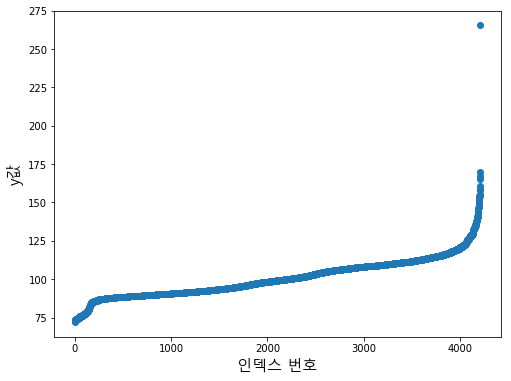

In [5]:
plt.figure(figsize=(8,6))

plt.scatter(range(train.shape[0]), #0,1,2,...,4208 (트레인데이터셋 index를 의미)
            np.sort(train.y.values)) #train데이터셋의 y값을 본다.

plt.xlabel('인덱스 번호', fontproperties=fontprop)
plt.ylabel('y값', fontproperties=fontprop)

4000번째 근처 값이 다른 데이터의 y값보다 더 높다.

단일 데이터 값이 나머지보다 더 높다.

다음은 분포 그래프를 plot으로 나타냈다.

### 트레인데이터셋 y값 분포그래프

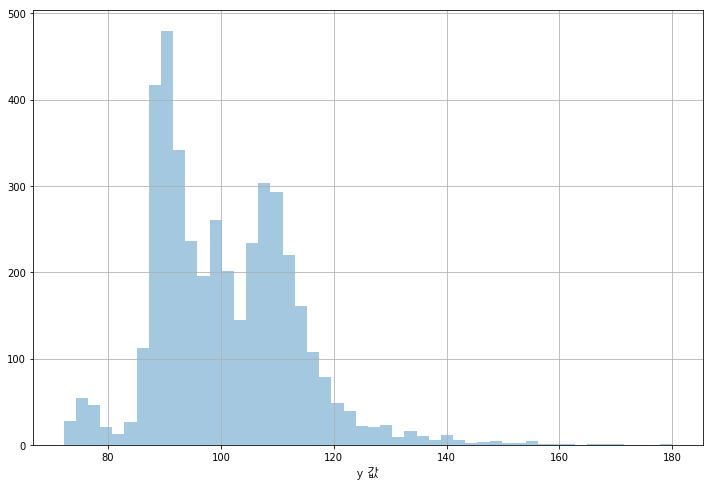

In [6]:
ulimit=180  #일단 그래프 보고 최댓값을 180으로 잡은듯..

# 트레인데이터셋의 y값이 ulimit(180)보다 크다면 180으로 설정.
train['y'].loc[train['y']>ulimit]= ulimit 

plt.figure(figsize=(12,8))
sns.distplot(train.y.values, bins=50, kde=False)
plt.xlabel('y 값', fontproperties=fontprop, fontsize=12)
plt.grid()
plt.show()

# y값을 가진 데이터의 분포를 나타냄...
# 트레인데이터가 4209개나 있으니..


### 데이터타입 확인

트레인 데이터셋에 존재하는 컬럼값들의 데이터 타입을 알아본다.

In [7]:
dtype= train.dtypes.reset_index() #train 데이터셋의 컬럼집합을 나타낸다..
dtype.columns = ["Count", "Column Type"]

# column type 컬럼 그룹별 합계를 나타냄?
dtype.groupby('Column Type').aggregate('count').reset_index()

,Column Type,Count
0,int64,369
1,float64,1
2,object,8


컬럼의 대부분은 int65(int, 정수)타입이다.

정수타입으로 된 컬럼을 8개로 분류시키고 1개의 컬럼은 target(예측)에 속한다.

X0~X6,X8 의 타입은 object이고, 분류된 컬럼이다.

In [8]:
dtype.loc[:10, :] #10행만 보여준다.

,Count,Column Type
0,ID,int64
1,y,float64
2,X0,object
3,X1,object
4,X2,object
5,X3,object
6,X4,object
7,X5,object
8,X6,object
9,X8,object


#### Missing Values (잃어버린 값)

missing value에 대해서 알아야한다.

In [9]:
# train데이터셋에서 null인 값을 찾는다.
missing = train.isnull().sum(axis=0).reset_index()

# 한개의 데이터포인트(행)에서 일부컬럼값이 존재하지 않는다면?
missing.columns=['column_name', 'missing_count']

# 잃어버린값이 0보다 큰경우
missing=missing.loc[missing['missing_count']>0]
missing=missing.sort_values(by='missing_count')
missing

,column_name,missing_count


기록이 없는걸 보아, 테스트데이터셋에서는 값없는 데이터포인트가 없다..

### Integer columns analysis

정수데이터 타입 컬럼 분석

In [11]:
unique_values_dict={}
not_integer_columns=['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']
for col in train.columns:
    # ID, y(float), X0~X8(object) 을 제외한 나머지 컬럼은 데이터 타입이 int이다.
    if col not in not_integer_columns:
        # unique_value
        unique_value=str(np.sort(train[col].unique()).tolist())
        
        tlist=unique_values_dict.get(unique_value, [])
        tlist.append(col)
        
        unique_values_dict[unique_value]=tlist[:]
        
for unique_val, columns in unique_values_dict.items():
    print('Columns containing the unique values: ',unique_val)
    print(columns)
    print('-------------------------------------------------------')


Columns containing the unique values:  [0, 1]
['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144', 'X145',

대부분의 정수컬럼들은 binary(0,1) 값을 갖는다.

어떤 컬럼들은 0을 갖는 값들도 있다. 

모델링 활동에 있어서 0만 갖는 컬럼을 제외시킨다.

### 데이터 타입이 int가 아닌 컬럼들에 대한 조사

#### 1. X0 컬럼

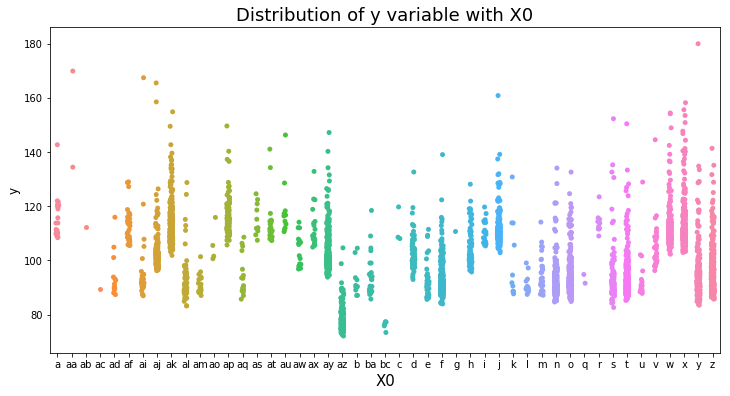

In [12]:
var_name= "X0"

col_order= np.sort(train[var_name].unique()).tolist()

plt.figure(figsize=(12,6))

sns.stripplot(x=var_name, y='y', data=train, order=col_order)

plt.xlabel(var_name, fontsize=15)

plt.ylabel('y', fontsize=12)

plt.title('Distribution of y variable with '+ var_name, fontsize=18)

plt.show()

#### 2. X1 컬럼

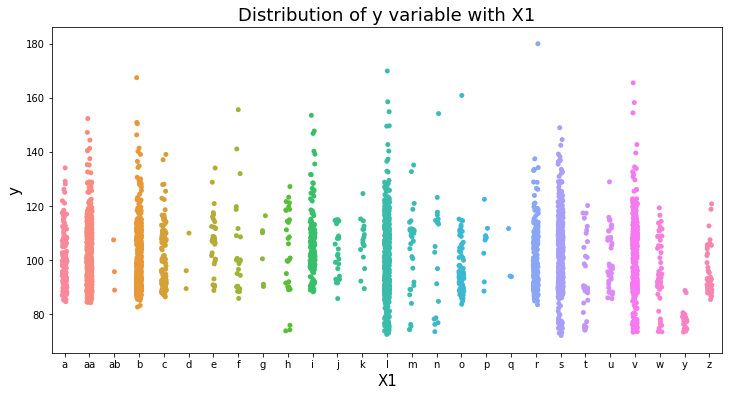

In [13]:
var_name="X1"
col_order= np.sort(train[var_name].unique()).tolist()

plt.figure(figsize=(12,6))

sns.stripplot(x=var_name, y='y', data=train, order=col_order)

plt.xlabel(var_name, fontsize=15)

plt.ylabel('y', fontsize=15)

plt.title('Distribution of y variable with '+var_name, fontsize=18)

plt.show()

#### 3. X2컬럼

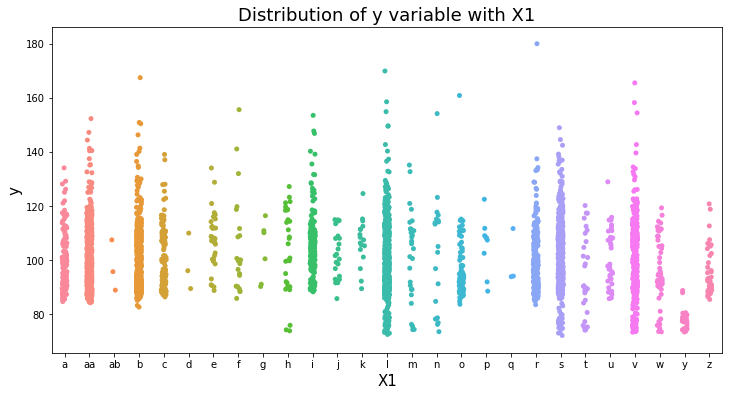

In [16]:
var_name="X1"
col_order= np.sort(train[var_name].unique()).tolist()

plt.figure(figsize=(12,6))

sns.stripplot(x=var_name, y='y', data=train, order=col_order)

plt.xlabel(var_name, fontsize=15)

plt.ylabel('y', fontsize=15)

plt.title('Distribution of y variable with '+var_name, fontsize=18)

plt.show()

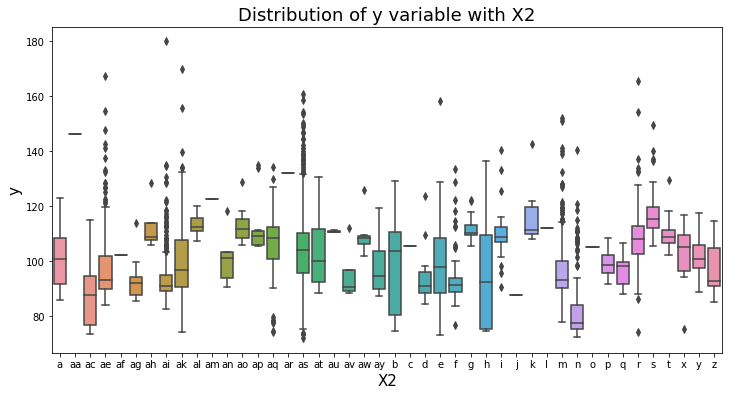

In [15]:
var_name="X2"
col_order= np.sort(train[var_name].unique()).tolist()

plt.figure(figsize=(12,6))

sns.boxplot(x=var_name, y='y', data=train, order=col_order)

plt.xlabel(var_name, fontsize=15)

plt.ylabel('y', fontsize=15)

plt.title('Distribution of y variable with '+var_name, fontsize=18)

plt.show()

#### 4. X3컬럼

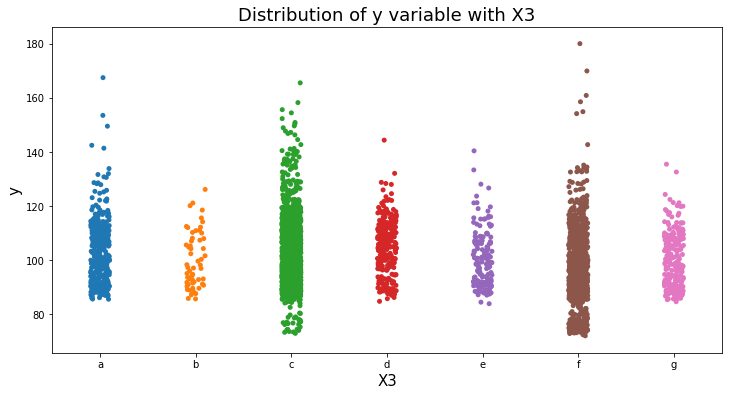

In [17]:
var_name="X3"
col_order= np.sort(train[var_name].unique()).tolist()

plt.figure(figsize=(12,6))

sns.stripplot(x=var_name, y='y', data=train, order=col_order)

plt.xlabel(var_name, fontsize=15)

plt.ylabel('y', fontsize=15)

plt.title('Distribution of y variable with '+var_name, fontsize=18)

plt.show()

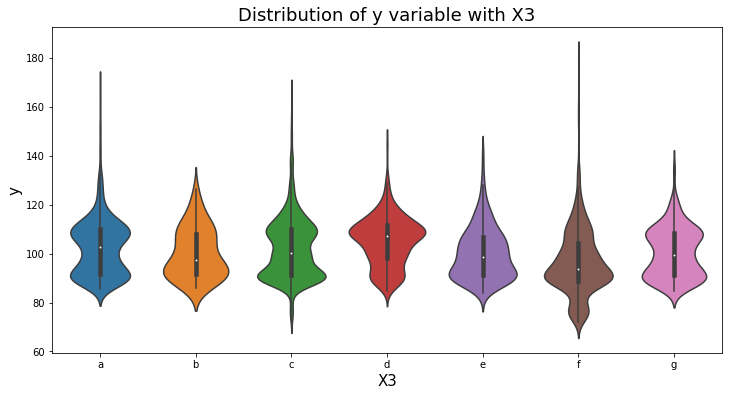

In [20]:
var_name="X3"
col_order= np.sort(train[var_name].unique()).tolist()

plt.figure(figsize=(12,6))

sns.violinplot(x=var_name, y='y', data=train, order=col_order)

plt.xlabel(var_name, fontsize=15)

plt.ylabel('y', fontsize=15)

plt.title('Distribution of y variable with '+var_name, fontsize=18)

plt.show()

#### 5. X4컬럼

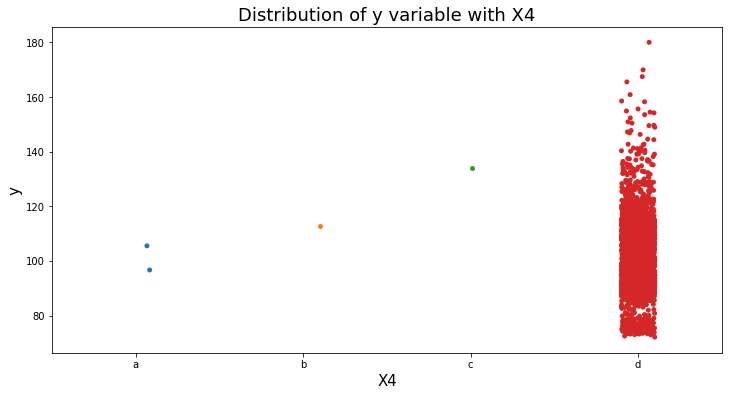

In [22]:
var_name="X4"
col_order= np.sort(train[var_name].unique()).tolist()

plt.figure(figsize=(12,6))

sns.stripplot(x=var_name, y='y', data=train, order=col_order)

plt.xlabel(var_name, fontsize=15)

plt.ylabel('y', fontsize=15)

plt.title('Distribution of y variable with '+var_name, fontsize=18)

plt.show()

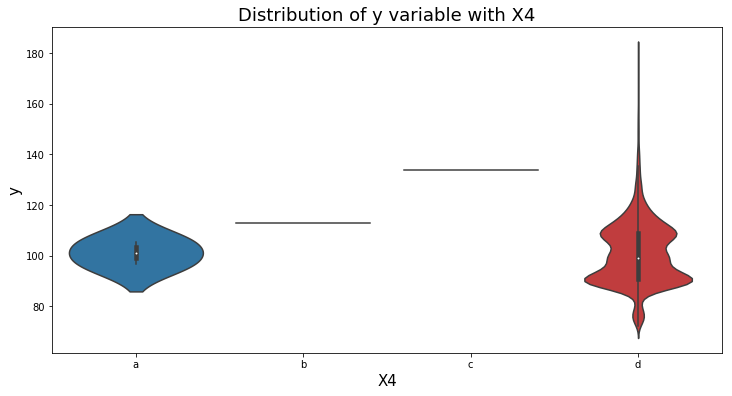

In [23]:
var_name="X4"
col_order= np.sort(train[var_name].unique()).tolist()

plt.figure(figsize=(12,6))

sns.violinplot(x=var_name, y='y', data=train, order=col_order)

plt.xlabel(var_name, fontsize=15)

plt.ylabel('y', fontsize=15)

plt.title('Distribution of y variable with '+var_name, fontsize=18)

plt.show()

#### 6. X5 컬럼

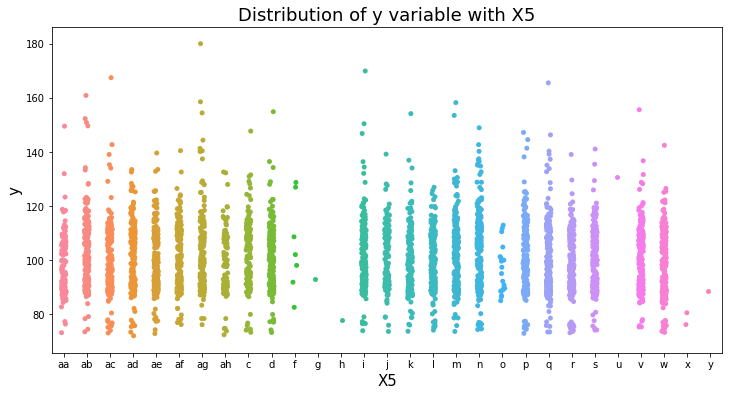

In [24]:
var_name="X5"
col_order= np.sort(train[var_name].unique()).tolist()

plt.figure(figsize=(12,6))

sns.stripplot(x=var_name, y='y', data=train, order=col_order)

plt.xlabel(var_name, fontsize=15)

plt.ylabel('y', fontsize=15)

plt.title('Distribution of y variable with '+var_name, fontsize=18)

plt.show()

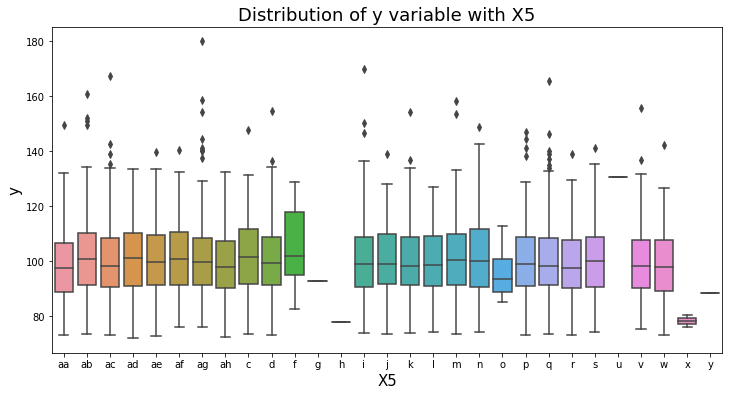

In [26]:
var_name="X5"
col_order= np.sort(train[var_name].unique()).tolist()

plt.figure(figsize=(12,6))

sns.boxplot(x=var_name, y='y', data=train, order=col_order)

plt.xlabel(var_name, fontsize=15)

plt.ylabel('y', fontsize=15)

plt.title('Distribution of y variable with '+var_name, fontsize=18)

plt.show()

#### 7. X6 컬럼

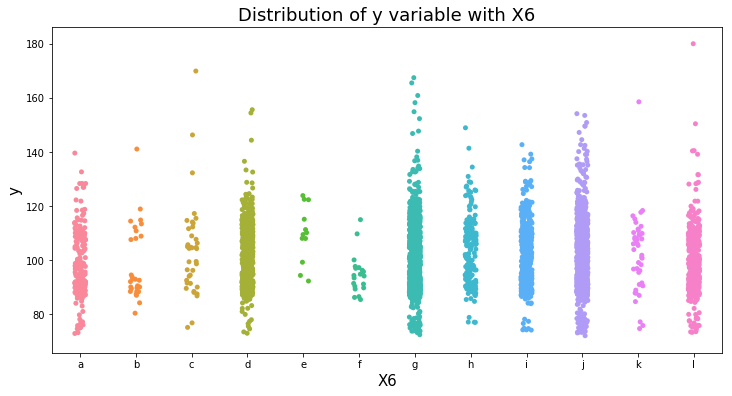

In [27]:
var_name="X6"
col_order= np.sort(train[var_name].unique()).tolist()

plt.figure(figsize=(12,6))

sns.stripplot(x=var_name, y='y', data=train, order=col_order)

plt.xlabel(var_name, fontsize=15)

plt.ylabel('y', fontsize=15)

plt.title('Distribution of y variable with '+var_name, fontsize=18)

plt.show()

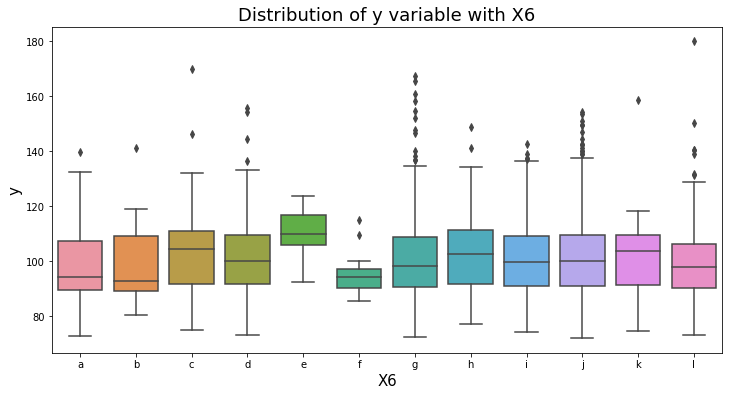

In [29]:
var_name="X6"
col_order= np.sort(train[var_name].unique()).tolist()

plt.figure(figsize=(12,6))

sns.boxplot(x=var_name, y='y', data=train, order=col_order)

plt.xlabel(var_name, fontsize=15)

plt.ylabel('y', fontsize=15)

plt.title('Distribution of y variable with '+var_name, fontsize=18)

plt.show()

#### 8. X8 컬럼

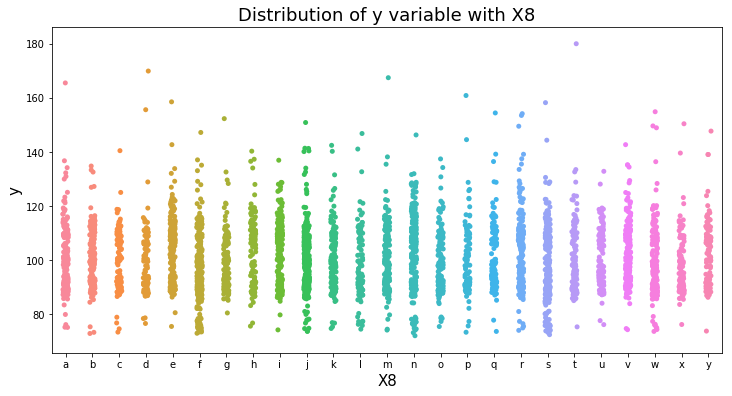

In [30]:
var_name="X8"
col_order= np.sort(train[var_name].unique()).tolist()

plt.figure(figsize=(12,6))

sns.stripplot(x=var_name, y='y', data=train, order=col_order)

plt.xlabel(var_name, fontsize=15)

plt.ylabel('y', fontsize=15)

plt.title('Distribution of y variable with '+var_name, fontsize=18)

plt.show()

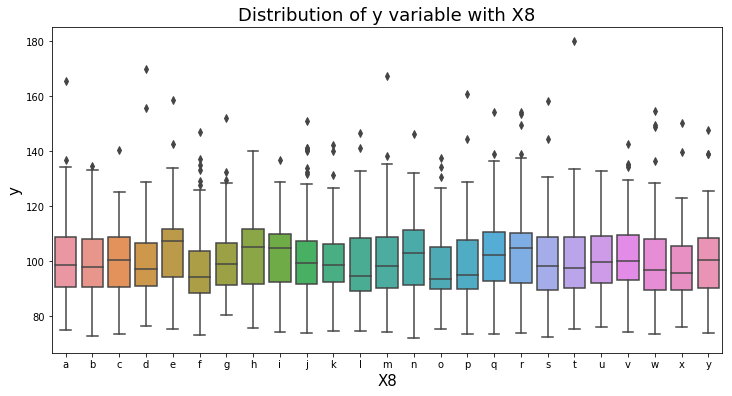

In [31]:
var_name="X8"
col_order= np.sort(train[var_name].unique()).tolist()

plt.figure(figsize=(12,6))

sns.boxplot(x=var_name, y='y', data=train, order=col_order)

plt.xlabel(var_name, fontsize=15)

plt.ylabel('y', fontsize=15)

plt.title('Distribution of y variable with '+var_name, fontsize=18)

plt.show()

### Binary Variables

데이터 타입이 [0,1]밖에 없는 바이너리 타입인 컬럼들에 대한 조사

대부분의 컬럼들이 바이너리 타입이다.

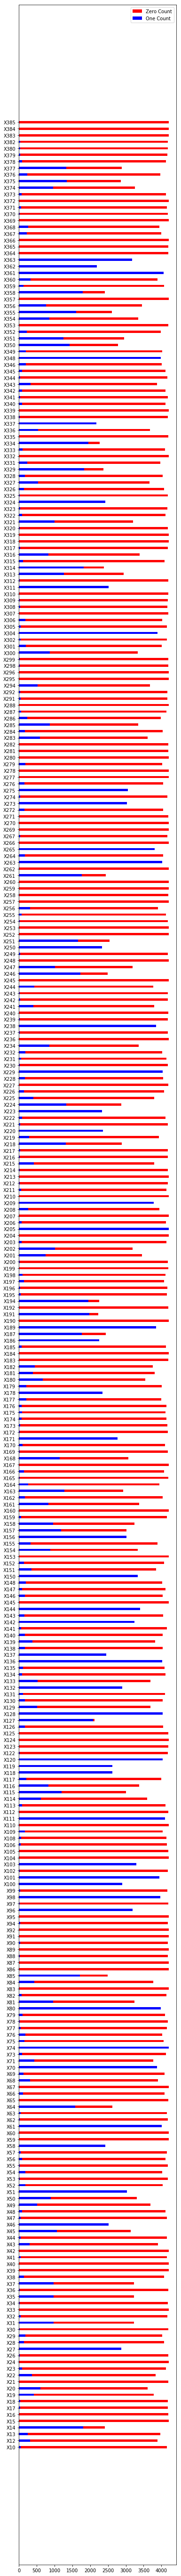

In [33]:
zero_count_list=[]

one_count_list=[]

# unique_val이 [0, 1] 형태인 경우
cols_list = unique_values_dict['[0, 1]'] # 바이너리 타입인 컬럼들을 모음.

for col in cols_list:
    zero_count_list.append((train[col]==0).sum()) #train['Xn']==0인 데이터포인트 개수
    one_count_list.append((train[col]==1).sum()) #train['Xn']==1인 데이터 포인트의 개수

    
N=len(cols_list) #바이너리 타입 컬럼들의 개수
ind= np.arange(N)
width=0.35

plt.figure(figsize=(6,100))
#각 컬럼에서 값이 0인 데이터포인트 개수
p1= plt.barh(ind, zero_count_list, width, color='red')

#각 컬럼에서 값이 1인 데이터포인트 개수
p2= plt.barh(ind, one_count_list, width, color='blue') 

plt.yticks(ind, cols_list)
plt.legend((p1[0], p2[0]), ('Zero Count', 'One Count'))

plt.show()

binary 형태를 갖는 컬럼에서의 y값 평균을 확인한다.

binary 컬럼값에서 컬럼값이 0과 1로 나눠서 그래프를 보여준다.
예를 들면 train['X10'] 값이 0인 데이터 포인트들의 y값들의 평균을 왼쪽에
train['X10']값이 1인 데이터 포인트들의 y값들의 평균을 오른쪽에 위치했다.


In [36]:
new_df=pd.DataFrame({"column_name":cols_list+cols_list,
                     "value":[0]*len(cols_list)+[1]*len(cols_list),
                     "y_mean":zero_mean_list+one_mean_list})

new_df

,column_name,value,y_mean
0,X10,0,100.688500
1,X12,0,100.323075
2,X13,0,100.495972
3,X14,0,98.509709
4,X15,0,100.642648
5,X16,0,100.617230
6,X17,0,100.826232
7,X18,0,100.650903
8,X19,0,101.381272
9,X20,0,101.137993


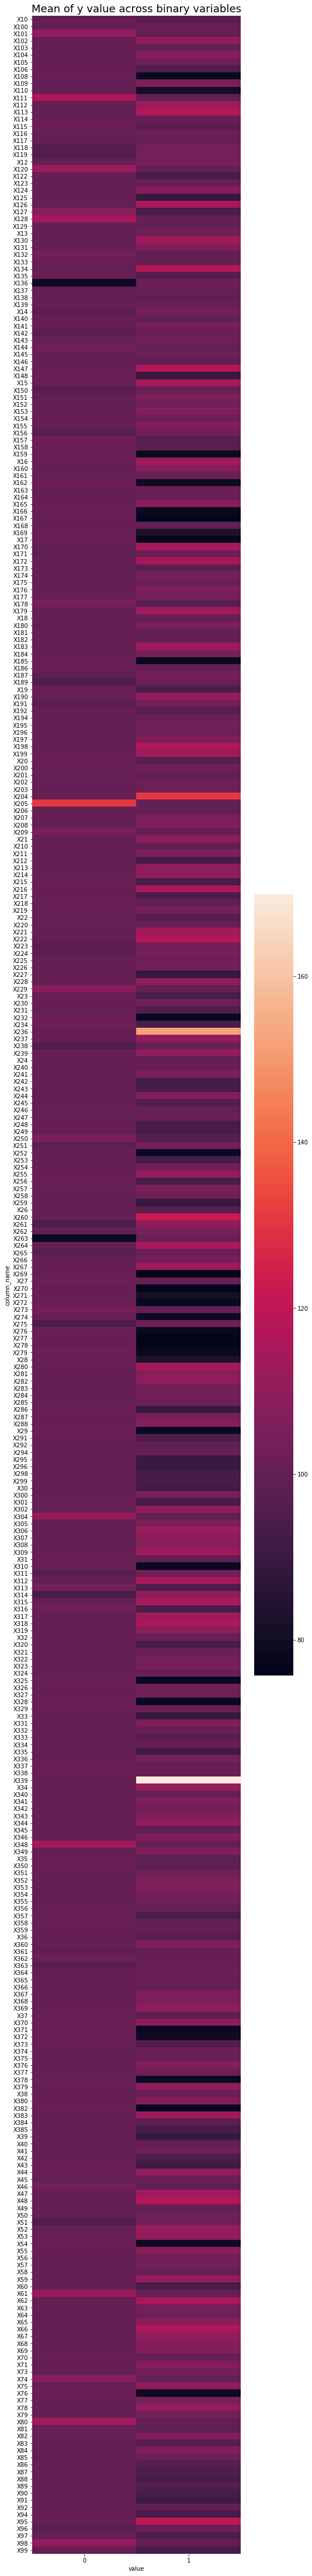

In [34]:
zero_mean_list=[]
one_mean_list=[]

# 정수타입이고, 0과 1만 갖는 컬럼들을 찾는다. 
cols_list = unique_values_dict['[0, 1]']

for col in cols_list:
    # train[col]==0인 데이터포인트들의 y값 평균
    zero_mean_list.append(train.loc[train[col]==0].y.mean())
    
    # train[col]==1인 데이터 포인트들의 y값 평균
    one_mean_list.append(train.loc[train[col]==1].y.mean())
    
new_df= pd.DataFrame({"column_name":cols_list+cols_list,
                     "value":[0]*len(cols_list)+[1]*len(cols_list),
                     "y_mean":zero_mean_list+one_mean_list})

new_df= new_df.pivot('column_name', 'value', 'y_mean')

plt.figure(figsize=(8,80))
sns.heatmap(new_df)
plt.title('Mean of y value across binary variables', fontsize=18)
plt.show()

### ID variable

가장중요한 컬럼은 id이다.

train과 test (random 또는 id 기반으로) 걸쳐서 어떻게 나눌지를 알 수있다.

id의 예측 기능을 갖는지 확인할 수 있다.

y컬럼이 id 컬럼과 같이 어떻게 변하는지를 봐야한다.

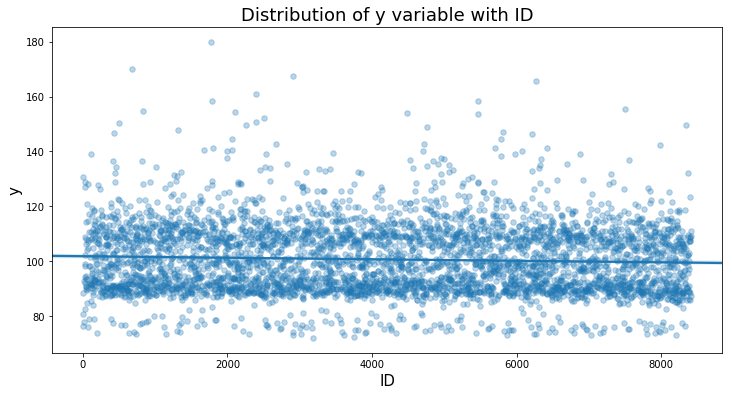

In [38]:
var_name="ID"

plt.figure(figsize=(12,6))

sns.regplot(x=var_name, y='y', data=train, scatter_kws={'alpha':0.3, 's':30})

plt.xlabel(var_name, fontsize=15)

plt.ylabel('y', fontsize=15)

plt.title('Distribution of y variable with '+var_name, fontsize=18)
plt.show()

ID 값에 의존해서 약간 감소하는 경향이 있다.(선이 기울어져 있음)

어떻게 ID가 train과 test를 걸쳐서 분배할지를(나눌지를) 봐야한다.

<Figure size 432x720 with 0 Axes>

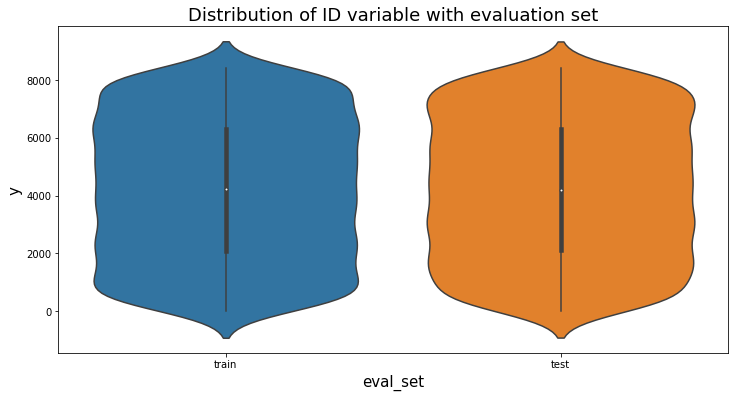

In [39]:
plt.figure(figsize=(6,10))

## 여기 부분 이해가 안갑니다 ㅠㅠ##
train['eval_set']='train'

test['eval_set']='test'
##################################
full=pd.concat([train[['ID','eval_set']], test[['ID', 'eval_set']]], axis=0)

plt.figure(figsize=(12,6))

sns.violinplot(x='eval_set', y='ID', data=full)

plt.xlabel('eval_set', fontsize=15)

plt.ylabel('y', fontsize=15)

plt.title('Distribution of ID variable with evaluation set', fontsize=18)
plt.show()

train, test 데이터셋에서 ID값으로 랜덤으로 나눈것같아 보인다.

### Important Variables 

xgboost 모델을 돌려보고 가장 중요한 컬럼(variable)을 얻는다.

[07:26:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


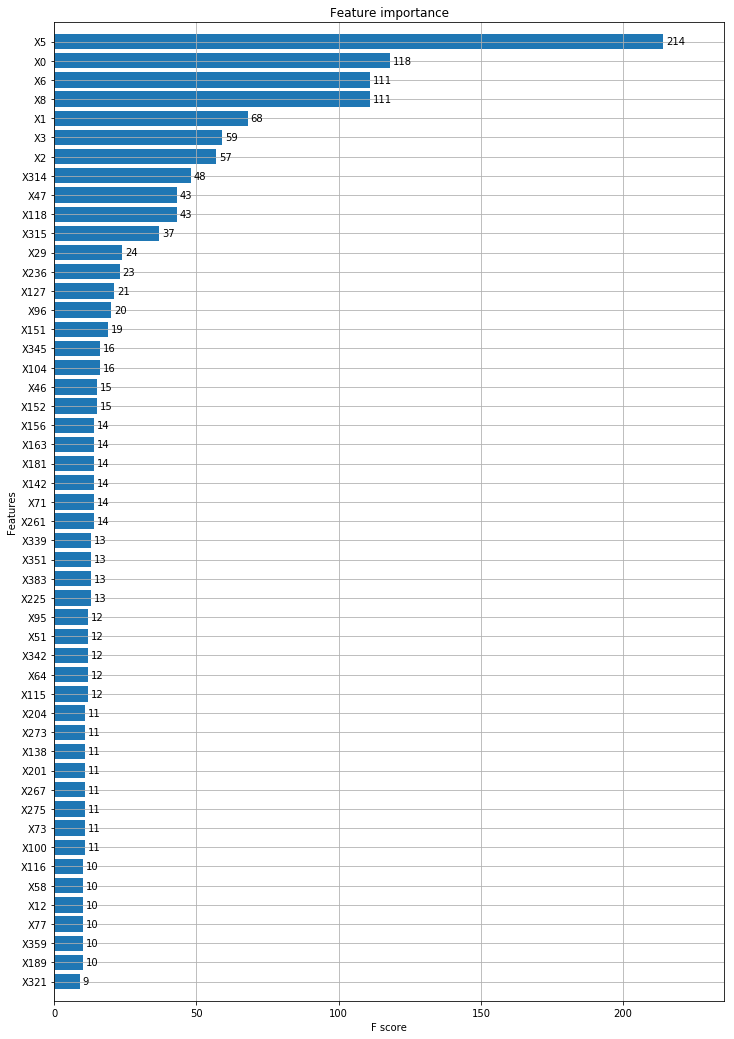

In [40]:
for col in ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']:
    lbl=preprocessing.LabelEncoder()
    lbl.fit(list(train[col].values))
    train[col]=lbl.transform(list(train[col].values))
    
train_y= train['y'].values
train_X= train.drop(['ID', 'y', 'eval_set'], axis=1)

# anokas가 만든 함수 
def xgb_r2_score(preds, dtrain):
    labels=dtrain.get_label()
    return 'r2', r2_score(labels, preds)

xgb_params={
    'eta':0.05,
    'max_depth': 6,
    'subsample':0.7,
    'colsample_bytree':0.7,
    'objective':'reg:linear',
    'silent':1
}

dtrain= xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model= xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100,
                feval=xgb_r2_score, maximize=True)

# 가장 중요한 feature을 고른다.
fig, ax= plt.subplots(figsize=(12,18))

xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

바이너리 타입의 컬럼들 중에서 카테고리형식으로 가장중요한 것을 먼저 넣었다.

그리고 Random Forest 모델로 빌드를 시키고 가장 중요한 컬럼을 구한다.

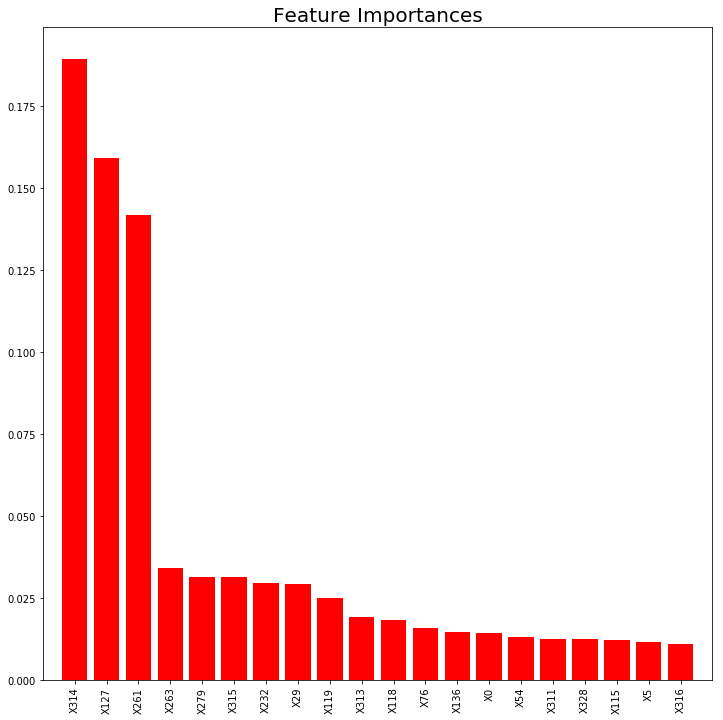

In [44]:
from sklearn import ensemble
# 랜덤포레스트 회귀 모델을 사용했다.
model= ensemble.RandomForestRegressor(n_estimators=200,
                                      max_depth=10,
                                      min_samples_leaf=4,
                                      max_features=0.2,
                                      n_jobs=-1, #전부다
                                      random_state=0 #난수생성기:여러번해도 같은결과출력
                                      )

model.fit(train_X, train_y)
feat_names=train_X.columns.values


# plot the importances (중요도를 그래프로 시각화) #
importances = model.feature_importances_
std= np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

indices=np.argsort(importances)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title('Feature Importances', fontsize=20)
plt.bar(range(len(indices)), importances[indices], color='r', align='center')

plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()